In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

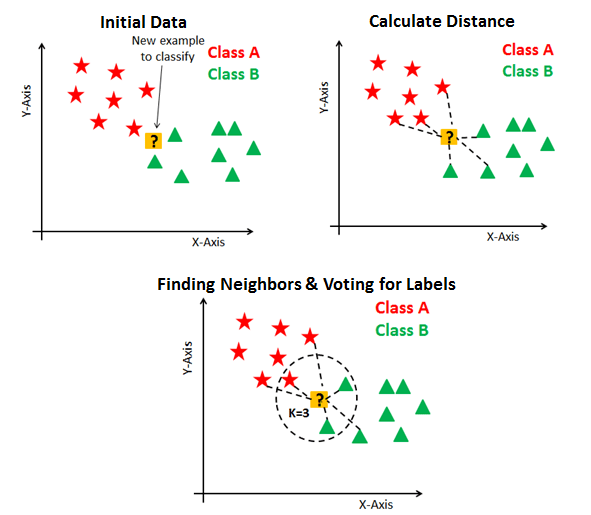

In [2]:
from sklearn import tree
from IPython.display import Image

Image(filename = "Lesson23-KNN.png",width=400, height=400)

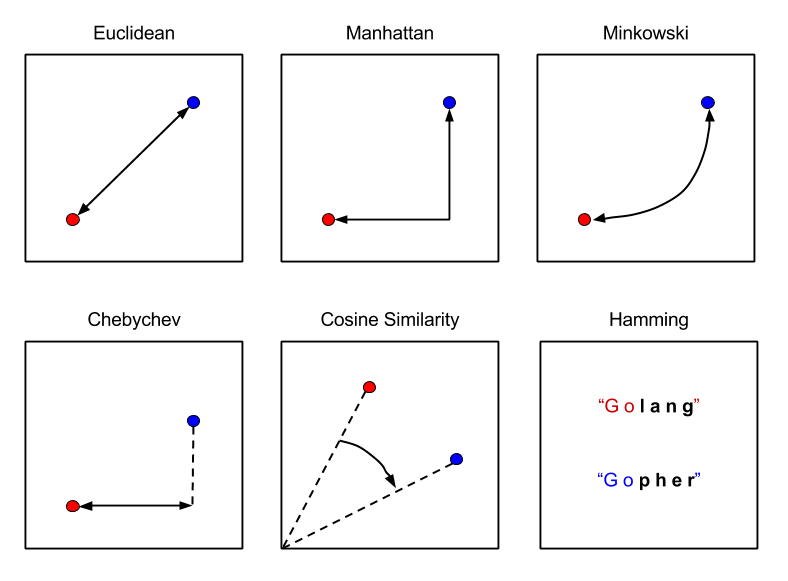

In [3]:
Image(filename = "Lesson23-Distance.png", width=400, height=400)

In [4]:
data = pd.read_csv("iris_data.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
X = data.drop(["species"],axis="columns")
y = data["species"]
X
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric = "minkowski",p=2)

cv = StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=2)

accuracies = cross_val_score(knn,X,y,cv=cv,scoring="accuracy")

print("Cross-Validation accuracy score:{}".format(accuracies))
print("Nean Crss-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy score:[1.         0.97368421 0.94736842 0.97368421 0.97368421 1.
 0.97368421 0.97368421 0.97368421 0.94736842]
Nean Crss-Validation accuracy score: 0.974


In [7]:
## search for an optimal value of k for KNN

k_range = range(1,31,2)
k_scores = []
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=cv,scoring="accuracy")
    k_scores.append(scores.mean())

print("Cross-Validation accuracy score:{}".format(k_scores))
print("*"*30)
print("Nean Crss-Validation accuracy score: {}\n".format(np.round(np.mean(k_scores),4)))


Cross-Validation accuracy score:[np.float64(0.9552631578947368), np.float64(0.9631578947368421), np.float64(0.9736842105263157), np.float64(0.9763157894736842), np.float64(0.9763157894736842), np.float64(0.9736842105263159), np.float64(0.976315789473684), np.float64(0.968421052631579), np.float64(0.9657894736842104), np.float64(0.9631578947368421), np.float64(0.9657894736842104), np.float64(0.9605263157894737), np.float64(0.9605263157894737), np.float64(0.9605263157894737), np.float64(0.9605263157894737)]
******************************
Nean Crss-Validation accuracy score: 0.9667



Text(0, 0.5, 'k_scores')

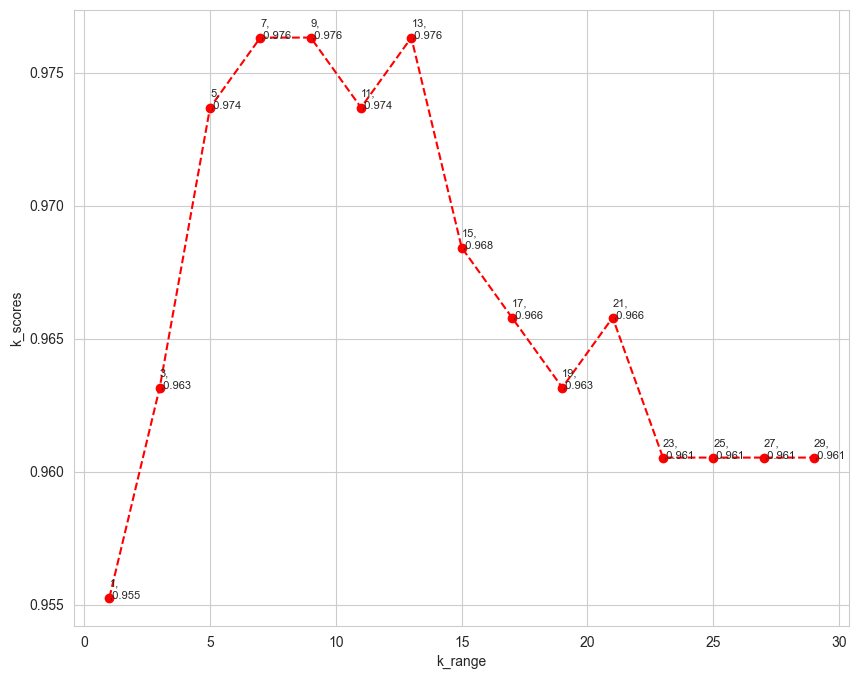

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.plot(k_range,k_scores,"ro",linestyle="--")
for x,m in zip(k_range,k_scores):
    plt.text(x,m,"{},\n,{:.3f}".format(x,m),fontsize=8, )
plt.xlabel("k_range")
plt.ylabel("k_scores")

### Grid seach on KNN classifier 

In [9]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [11]:
from sklearn.model_selection import GridSearchCV

k_range = range(1,31) #multiple values for k

weights_options = ["uniform","distance"] 

param = {"n_neighbors":k_range,"weights":weights_options} 

cv = StratifiedShuffleSplit(n_splits=10,test_size=0.3,random_state=15)

grid = GridSearchCV(KNeighborsClassifier(),param,cv=cv,verbose=False, n_jobs=-1)

grid.fit(X,y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the sc

In [12]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9666666666666668
{'n_neighbors': 13, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=13, weights='distance')


In [13]:
knn_grid = grid.best_estimator_
knn_grid.score(X,y)

1.0

### RandomizedSearchCV 

In [14]:
from sklearn.model_selection import RandomizedSearchCV

k_range = range(1,31) #multiple values for k

weights_options = ["uniform","distance"] 

param = {"n_neighbors":k_range,"weights":weights_options} 

cv = StratifiedShuffleSplit(n_splits=10,test_size=0.3)

grid = RandomizedSearchCV(KNeighborsClassifier(),param,cv=cv,verbose=False, n_jobs=-1, n_iter=40)

grid.fit(X,y)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",40
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-

In [15]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

knn_grid = grid.best_estimator_
knn_grid.score(X,y)

0.9777777777777779
{'weights': 'uniform', 'n_neighbors': 6}
KNeighborsClassifier(n_neighbors=6)


0.9733333333333334